In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [4]:
nba = pd.read_csv("shot_logs.csv")

In [6]:
nba.head(10) ##view top 10 rows

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,...,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148
6,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,7,4,10:15,14.5,11,...,20.7,2,missed,"Jack, Jarrett",101127,6.1,0,0,brian roberts,203148
7,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,8,4,8:00,3.4,3,...,3.5,2,made,"Plumlee, Mason",203486,2.1,1,2,brian roberts,203148
8,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,9,4,5:14,12.4,0,...,24.6,3,missed,"Morris, Darius",202721,7.3,0,0,brian roberts,203148
9,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,1,2,11:32,17.4,0,...,22.4,3,missed,"Ellington, Wayne",201961,19.8,0,0,brian roberts,203148


In [7]:
nba.columns = nba.columns.str.lower()

In [8]:
nba.shape ##View data

(128069, 21)

In [9]:
nba.isnull().sum() ##View null values

game_id                          0
matchup                          0
location                         0
w                                0
final_margin                     0
shot_number                      0
period                           0
game_clock                       0
shot_clock                    5567
dribbles                         0
touch_time                       0
shot_dist                        0
pts_type                         0
shot_result                      0
closest_defender                 0
closest_defender_player_id       0
close_def_dist                   0
fgm                              0
pts                              0
player_name                      0
player_id                        0
dtype: int64

In [10]:
nba[nba.shot_clock.isnull()==True].head() ##View null value column for shot clock per prev values

,game_id,matchup,location,w,final_margin,shot_number,period,game_clock,shot_clock,dribbles,...,shot_dist,pts_type,shot_result,closest_defender,closest_defender_player_id,close_def_dist,fgm,pts,player_name,player_id
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
24,21400845,"FEB 25, 2015 - CHA @ CHI",A,W,12,6,2,0:04,NaN,0,...,25.2,3,missed,"Butler, Jimmy",202710,3.6,0,0,brian roberts,203148
54,21400768,"FEB 08, 2015 - CHA vs. IND",H,L,-1,14,4,0:01,NaN,5,...,34.4,3,missed,"Hill, George",201588,3.6,0,0,brian roberts,203148
76,21400742,"FEB 05, 2015 - CHA vs. WAS",H,W,7,10,3,0:01,NaN,2,...,13.1,2,made,"Butler, Rasual",2446,2.5,1,2,brian roberts,203148
129,21400611,"JAN 19, 2015 - CHA vs. MIN",H,W,25,7,2,0:02,NaN,5,...,12.0,2,missed,"Williams, Mo",2590,4.0,0,0,brian roberts,203148


In [14]:
new_nba = nba.drop(columns=["matchup", ##Do not care about matchup
                          "final_margin", ##margin doesnt matter
                          "shot_number", ##Does not matter
                          "closest_defender", ##Scrapped from final project 
                          "closest_defender_player_id", ##Scrapped as well
                          "fgm", ##Do not care about field goals made or attempted only 2 or 3 pointers
                          "pts", ##Do not really care about overall points
                          "player_id"], axis=1) ##Wont filter by player_id just need the name

In [15]:
new_nba.describe()

,game_id,period,shot_clock,dribbles,touch_time,shot_dist,pts_type,close_def_dist
count,1.280690e+05,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,4.123015
std,2.578773e+02,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,2.756446
min,2.140000e+07,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,0.000000
25%,2.140023e+07,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,2.300000
50%,2.140045e+07,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,3.700000
75%,2.140067e+07,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,5.300000
max,2.140091e+07,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,53.200000


In [17]:
##touch time should not have a negative value so need to investigate a bit more to see whats going on
len(new_nba.touch_time[new_nba.touch_time<0])

312

In [20]:
##adjusting for the touch_time negative value concerns
new_nba.touch_time[new_nba.touch_time<0] = new_nba.touch_time.mean()

In [21]:
new_nba.isnull().sum()

game_id              0
location             0
w                    0
period               0
game_clock           0
shot_clock        5567
dribbles             0
touch_time           0
shot_dist            0
pts_type             0
shot_result          0
close_def_dist       0
player_name          0
dtype: int64

In [22]:
##View the new data fram data types
new_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   game_id         128069 non-null  int64  
 1   location        128069 non-null  object 
 2   w               128069 non-null  object 
 3   period          128069 non-null  int64  
 4   game_clock      128069 non-null  object 
 5   shot_clock      122502 non-null  float64
 6   dribbles        128069 non-null  int64  
 7   touch_time      128069 non-null  float64
 8   shot_dist       128069 non-null  float64
 9   pts_type        128069 non-null  int64  
 10  shot_result     128069 non-null  object 
 11  close_def_dist  128069 non-null  float64
 12  player_name     128069 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 12.7+ MB


In [23]:
##Converting values from categorical to nominal to enable math possibilities
new_nba.location = new_nba.location.map({"H":1,"A":0})
new_nba.w = new_nba.w.map({"W":1,"L":0})
new_nba.pts_type = new_nba.pts_type.map({2:0,3:1})
new_nba.shot_result = new_nba.shot_result.map({"made":1,"missed":0}) ##Assigning values for shots made and shots missed from categorical to nominal

In [25]:
new_nba = new_nba.rename(columns={"location":"home_away","pts_type":"3pts_shot","shot_result":"hit"})

In [26]:
new_nba.head(10)##view first 10 rows new df

,game_id,home_away,w,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,3pts_shot,hit,close_def_dist,player_name
0,21400899,0,1,1,1:09,10.8,2,1.9,7.7,0,1,1.3,brian roberts
1,21400899,0,1,1,0:14,3.4,0,0.8,28.2,1,0,6.1,brian roberts
2,21400899,0,1,1,0:00,NaN,3,2.7,10.1,0,0,0.9,brian roberts
3,21400899,0,1,2,11:47,10.3,2,1.9,17.2,0,0,3.4,brian roberts
4,21400899,0,1,2,10:34,10.9,2,2.7,3.7,0,0,1.1,brian roberts
5,21400899,0,1,2,8:15,9.1,2,4.4,18.4,0,0,2.6,brian roberts
6,21400899,0,1,4,10:15,14.5,11,9.0,20.7,0,0,6.1,brian roberts
7,21400899,0,1,4,8:00,3.4,3,2.5,3.5,0,1,2.1,brian roberts
8,21400899,0,1,4,5:14,12.4,0,0.8,24.6,1,0,7.3,brian roberts
9,21400890,1,1,2,11:32,17.4,0,1.1,22.4,1,0,19.8,brian roberts


In [41]:
##View unique values
new_nba.nunique()

game_id           904
home_away           2
w                   2
period              7
game_clock        719
shot_clock        242
dribbles           33
touch_time        242
shot_dist         448
3pts_shot           2
hit                 2
close_def_dist    299
player_name       281
dtype: int64

In [47]:
##View data info and verify to negative values in touch_time that would not be possible
new_nba.describe() ##figure out how to convery shot_clock value to seconds

,game_id,home_away,w,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,3pts_shot,hit,close_def_dist
count,1.280690e+05,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.499215,0.504377,2.469427,351.393811,12.453344,2.023355,2.778696,13.571504,0.264670,0.452139,4.123015
std,2.578773e+02,0.500001,0.499983,1.139919,207.590603,5.636611,3.477760,2.983555,8.888964,0.441159,0.497706,2.756446
min,2.140000e+07,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.140023e+07,0.000000,0.000000,1.000000,172.000000,8.400000,0.000000,0.900000,4.700000,0.000000,0.000000,2.300000
50%,2.140045e+07,0.000000,1.000000,2.000000,352.000000,12.453344,1.000000,1.600000,13.700000,0.000000,0.000000,3.700000
75%,2.140067e+07,1.000000,1.000000,3.000000,531.000000,16.400000,2.000000,3.700000,22.500000,1.000000,1.000000,5.300000
max,2.140091e+07,1.000000,1.000000,7.000000,720.000000,24.000000,32.000000,24.900000,47.200000,1.000000,1.000000,53.200000


In [53]:
# converting the game_clock values to the seconds
new_nba.game_clock = new_nba.game_clock.apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))

AttributeError: 'int' object has no attribute 'split'

In [54]:
new_nba.head(10) ##Confirming shot clock values in seconds 

,game_id,home_away,w,period,game_clock,shot_clock,dribbles,touch_time,shot_dist,3pts_shot,hit,close_def_dist,player_name
0,21400899,0,1,1,69,10.800000,2,1.9,7.7,0,1,1.3,brian roberts
1,21400899,0,1,1,14,3.400000,0,0.8,28.2,1,0,6.1,brian roberts
2,21400899,0,1,1,0,12.453344,3,2.7,10.1,0,0,0.9,brian roberts
3,21400899,0,1,2,707,10.300000,2,1.9,17.2,0,0,3.4,brian roberts
4,21400899,0,1,2,634,10.900000,2,2.7,3.7,0,0,1.1,brian roberts
5,21400899,0,1,2,495,9.100000,2,4.4,18.4,0,0,2.6,brian roberts
6,21400899,0,1,4,615,14.500000,11,9.0,20.7,0,0,6.1,brian roberts
7,21400899,0,1,4,480,3.400000,3,2.5,3.5,0,1,2.1,brian roberts
8,21400899,0,1,4,314,12.400000,0,0.8,24.6,1,0,7.3,brian roberts
9,21400890,1,1,2,692,17.400000,0,1.1,22.4,1,0,19.8,brian roberts


In [55]:
shot_perc_by_player = new_nba.groupby("player_name", as_index=False)[["hit"]].mean().sort_values(by="hit", ascending=False)
shot_perc_by_player.hit = shot_perc_by_player.hit.apply(lambda x: round(x*100, 2))
##Show top 10 players by "hit" percentage - did not expect these results at all
shot_perc_by_player.head(10)

,player_name,hit
66,deandre jordan,71.25
270,tyson chandler,67.65
235,rudy gobert,62.55
98,greg smith,61.70
109,james johnson,61.41
82,ed davis,60.29
8,alexis ajinca,59.72
188,mason plumlee,58.56
132,john henson,58.09
45,chris andersen,58.09


In [59]:
hit_clock = new_nba.groupby("shot_clock", as_index=False)[["hit"]].mean() ##create hit_clock to filter by shot_clock that hit

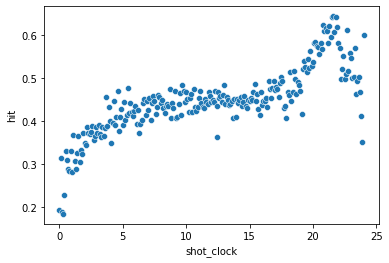

In [60]:
sns.scatterplot(x = "shot_clock", y = "hit", data = hit_clock);

In [61]:
##avg number of missed shots
round(new_nba[new_nba.hit==0].shot_clock.mean(),2)

11.97

In [63]:
#avg number of hit shots
round(new_nba[new_nba.hit==1].shot_clock.mean(),2)

13.04

In [64]:
##3 pointer hit rate
new_nba[new_nba["3pts_shot"]==1].hit.mean()

0.3515164031154118

In [68]:
##2 pointer hit rate
new_nba[new_nba["3pts_shot"]==0].hit.mean()

0.48835653531266926

In [81]:
three_pointer_by_player = new_nba.groupby("player_name", as_index=False)[["3pts_shot"]].mean().sort_values(by = "3pts_shot", ascending = False)

In [82]:
three_pointer_by_player.head(10)

,player_name,3pts_shot
195,mike miller,0.851064
162,kyle korver,0.742678
129,joe harris,0.730000
214,pablo prigioni,0.729885
42,channing frye,0.725728
115,jason terry,0.725664
175,luke babbitt,0.660256
101,hedo turkoglu,0.656863
249,steve blake,0.639676
58,damjan rudez,0.630769
